#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
df_flights = pd.read_csv(r'..\..\2_data\flights_random_sample.csv', sep=',')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,986,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,1099,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,197,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# extract month from flight date

df_flights['month'] = pd.DatetimeIndex(df_flights['fl_date']).month
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,1.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN,1
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,0.0,0.0,11.0,0.0,35.0,NaN,NaN,NaN,NaN,1
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1


In [7]:
# get median monthly arrival delay

df_flights.groupby('month', as_index=False).agg(median_arr_delay = ('arr_delay','median')).sort_values(by='median_arr_delay', ascending=False)

,month,median_arr_delay
4,5,-5.0
5,6,-5.0
6,7,-5.0
7,8,-5.0
11,12,-5.0
1,2,-6.0
3,4,-6.0
10,11,-6.0
2,3,-7.0
9,10,-7.0


Text(0.5, 1.0, 'Median Arrival Delay by Month')

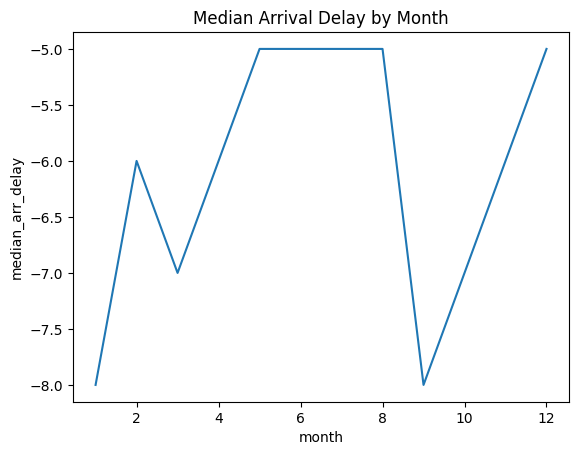

In [8]:
to_plot = df_flights.groupby('month', as_index=False).agg(median_arr_delay = ('arr_delay','median')).sort_values(by='month')
g = sns.lineplot(data=to_plot, x='month', y='median_arr_delay')
g.set_title('Median Arrival Delay by Month')

In [9]:
# get mean monthly arrival delay

df_flights.groupby('month', as_index=False).agg(mean_arr_delay = ('arr_delay','mean')).sort_values(by='mean_arr_delay', ascending=False)

,month,mean_arr_delay
5,6,10.110002
7,8,10.088413
6,7,8.887685
4,5,6.801185
1,2,6.575149
11,12,6.068550
3,4,5.377257
2,3,2.890610
9,10,2.466155
0,1,2.282651


In [10]:
to_plot = df_flights.groupby('month', as_index=False).agg(mean_arr_delay = ('arr_delay','mean')).sort_values(by='month')
to_plot

,month,mean_arr_delay
0,1,2.282651
1,2,6.575149
2,3,2.890610
3,4,5.377257
4,5,6.801185
5,6,10.110002
6,7,8.887685
7,8,10.088413
8,9,0.508462
9,10,2.466155


Text(0.5, 1.0, 'Mean Arrival Delay by Month')

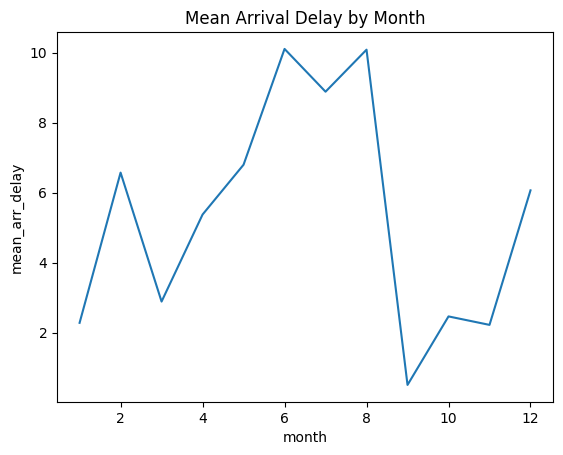

In [11]:
g = sns.lineplot(data=to_plot, x='month', y='mean_arr_delay')
g.set_title('Mean Arrival Delay by Month')

#### Average / median monthly flight delay is higher in the summer months in the US - May to August. This may be because people tend to go on vacation more during the summer, especially when children are not in school and families can take trips.

#### Overall, the distribution of flight delays is highly positively skewed, with some extreme outliers where planes were very delayed.

#### Implications for Feature Engineering:
- extract month and season(winter, spring, summer, fall) from flight date and use that to predict arrival delay
- log transformation of arrival delay to make it more normally distributed and/or remove outliers?

In [ ]:
# If time: plot median / mean side by side or overlaid with legend.

#### Further Analysis:

<AxesSubplot: >

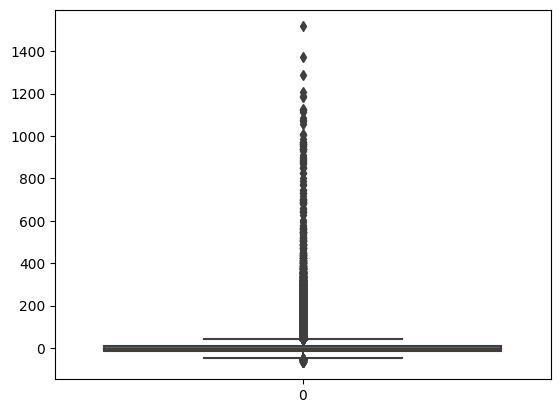

In [12]:
sns.boxplot(data=df_flights['arr_delay'])

<AxesSubplot: xlabel='arr_delay', ylabel='Count'>

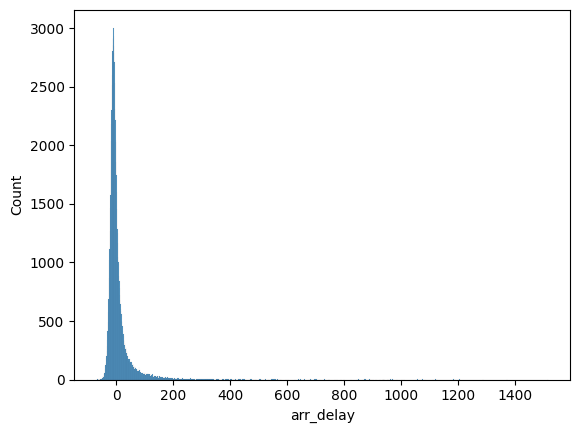

In [13]:
sns.histplot(data=df_flights['arr_delay'])

In [14]:
df_flights['arr_delay'].describe()

count    99110.000000
mean         5.384240
std         48.489584
min        -68.000000
25%        -15.000000
50%         -6.000000
75%          8.000000
max       1516.000000
Name: arr_delay, dtype: float64

In [18]:
filter = df_flights[['op_unique_carrier','arr_delay']]
filter.groupby(['op_unique_carrier']).mean('arr_delay').sort_values(by='arr_delay', ascending=False)

,arr_delay
op_unique_carrier,
C5,22.797297
G7,12.602999
YV,11.750000
AX,11.480198
F9,10.346877
B6,9.809173
EV,9.674641
KS,8.812500
ZW,8.336234


Average / median monthly flight delay is higher in the summer months in the US - May to August. This may be because people tend to go on vacation more during the summer, especially when children are not in school and families can take trips.

Overall, the distribution of flight delays is highly positively skewed, with some extreme outliers where planes were very delayed.